In [140]:
## Load packages 
#importing modules
import os
import pip

import numpy as np
%pip install mne
import mne # type: ignore

%pip install pandas
%pip install scikit-learn


import pandas as pd
import sklearn

import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pathlib import Path
  
import os
import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [141]:
# Load data 
raw = mne.io.read_raw_brainvision("/Users/lina/Documents/GitHub/ore_EEG/data/Group12_own.vhdr", preload=True, eog = ('HEOG','VEOG'), misc = ['41'])
raw2 = mne.io.read_raw_brainvision("/Users/lina/Documents/GitHub/ore_EEG/data/group12b_own.vhdr", preload=True, eog = ('HEOG','VEOG'), misc = ['41'])

## Plot
# reading the file & loading in the data
# Define the subject and file path
eeg_subj = 'Group12_own' # this is mads I hope
data_raw_file = os.path.join("/Users/lina/Documents/GitHub/ore_EEG/data/", eeg_subj + '.vhdr')

raw = mne.io.read_raw_brainvision(data_raw_file, eog = ('HEOG', 'VEOG'), misc = ["41"])
raw.info['bads'] = []

raw.load_data()
raw2.load_data()

Extracting parameters from /Users/lina/Documents/GitHub/ore_EEG/data/Group12_own.vhdr...
Setting channel info structure...
Reading 0 ... 523239  =      0.000 ...   523.239 secs...


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/384151929.py:2: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision("/Users/lina/Documents/GitHub/ore_EEG/data/Group12_own.vhdr", preload=True, eog = ('HEOG','VEOG'), misc = ['41'])


Extracting parameters from /Users/lina/Documents/GitHub/ore_EEG/data/group12b_own.vhdr...
Setting channel info structure...
Reading 0 ... 547379  =      0.000 ...   547.379 secs...


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/384151929.py:3: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw2 = mne.io.read_raw_brainvision("/Users/lina/Documents/GitHub/ore_EEG/data/group12b_own.vhdr", preload=True, eog = ('HEOG','VEOG'), misc = ['41'])


Extracting parameters from /Users/lina/Documents/GitHub/ore_EEG/data/Group12_own.vhdr...
Setting channel info structure...
Reading 0 ... 523239  =      0.000 ...   523.239 secs...


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/384151929.py:11: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(data_raw_file, eog = ('HEOG', 'VEOG'), misc = ["41"])


<RawBrainVision | group12b_own.eeg, 33 x 547380 (547.4 s), ~137.8 MB, data loaded>

### Setting montage and common ave referencing

In [142]:
# selecting only EEG and stimulus data & plotting raw data
montage = mne.channels.make_standard_montage('standard_1020')

raw.set_montage(montage, verbose=False)
#raw.pick_types(meg=False, eeg=True, eog=True, stim=True, exclude=[])
raw.pick_types(meg=False, eeg=True, eog=True, misc=True, exclude=[])
raw.set_eeg_reference(ref_channels='average', ch_type='eeg')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


Applying average reference.
Applying a custom ('EEG',) reference.


<RawBrainVision | Group12_own.eeg, 33 x 523240 (523.2 s), ~131.8 MB, data loaded>

## Here we add the diode part to align the timing of the triggers

In [143]:
## epoching data 
events, events_id = mne.events_from_annotations(raw)  # Extract events from annotations

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 40', 'Stimulus/S 50', 'Stimulus/S 54', 'Stimulus/S 58', 'Stimulus/S 62', 'Stimulus/S130', 'Stimulus/S140', 'Stimulus/S150', 'Stimulus/S156', 'Stimulus/S158', 'Stimulus/S170', 'Stimulus/S172', 'Stimulus/S220', 'Stimulus/S222', 'Stimulus/S252']


In [144]:
# deleting spurious triggers (e.g. from the trigger not be re-set between triggers events)
#If dif < 2 for trigger onsets, then reject preceding trial - i.e. if there's only 1 ms between triggers
dif_onsets = np.diff(events[:,0])
dif_idx = np.where(dif_onsets<2)[0]
events = np.delete(events, dif_idx, axis = 0)
print('event number {} was rejected'.format(dif_idx))

event number [   2    4    9   11   13   15   17   20   22   24   29   31   33   35
   38   40   42   44   46   48   50   53   55   59   61   63   65   70
   72   74   76   78   80   82   84   90   92   94   99  101  103  106
  108  110  112  114  123  125  127  129  131  133  135  138  140  142
  144  146  151  153  156  159  162  166  168  171  173  175  178  180
  183  185  188  190  193  195  197  200  203  205  207  211  213  216
  218  221  223  228  230  233  235  238  241  246  251  254  258  261
  263  274  277  279  281  283  291  294  297  300  302  304  307  310
  320  322  324  326  329  332  335  338  341  344  347  351  353  356
  363  365  371  374  377  380  389  391  393  396  399  402  407  410
  413  418  421  424  427  432  437  440  445  448  453  456  459  462
  465  468  471  474  483  486  489  492  495  498  501  504  507  510
  512  514  519  521  523  526  529  531  533  540  543  546  548  550
  553  556  559  564  566  568  570  572  574  576  579  581  58

In [145]:
import pandas as pd

# import data
behav_data = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv")
# Convert all values to lowercase in the 'gender' column
behav_data['gender'] = behav_data['gender'].str.lower() # mads

# Replace 'female' with 'male' in the 'gender' column
behav_data['gender'] = behav_data['gender'].replace('female', 'male') # mads

# Check if the image filename contains a capital 'A', and if so, change the 'img_ethnicity' column to 'asian'
behav_data.loc[behav_data['i'].str.contains('A'), 'img_ethnicity'] = 'asian'

# Add a new column to the DataFrame
behav_data['ethnicity_trigger'] = ""

# Assign trigger values in the new column
for index, row in behav_data.iterrows():
    emotion = row["img_emotion"]  # Accessing value in the 'img_emotion' column of the current row
    ethnicity = row["img_ethnicity"]  # Accessing value in the 'img_ethnicity' column of the current row

    if emotion == "neutral":
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 41 # asian/neutral
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 42 # black/neutral
        else:
            behav_data.at[index, "ethnicity_trigger"] = 43  # white/neutral

    elif emotion == "happy": 
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 21  # asian/happy
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 22  # black/happy
        else:
            behav_data.at[index, "ethnicity_trigger"] = 23  # white/happy

    else:  # Assuming 'sad' emotion
        if ethnicity == "asian":
            behav_data.at[index, "ethnicity_trigger"] = 31  # asian/sad
        elif ethnicity == "black":
            behav_data.at[index, "ethnicity_trigger"] = 32  # black/sad
        else:
            behav_data.at[index, "ethnicity_trigger"] = 33  # white/sad

# Save the modified DataFrame back to the same file
behav_data.to_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv", index=False)

# Import new data
behav_data_new = pd.read_csv("/Users/lina/Documents/GitHub/ore_EEG/data/cleaned_logfile_sub1.csv")

counter = 0
for event in events:
    if event[-1] in [20, 30, 40]:

        # Get the corresponding event from the behavioral data
        behav_event = behav_data_new.iloc[counter]
        counter += 1

        # Extract relevant information from the behav_event
        ethnicity_trigger = behav_event["ethnicity_trigger"]
        
        # Assign event numbers based on the ethnicity_trigger value
        event[-1] = ethnicity_trigger

for event in events: 
    print(event[-1])

99999
42
140
22
220
22
220
42
140
32
130
21
220
43
140
22
220
21
220
33
130
33
130
32
130
42
140
43
140
33
130
32
130
23
220
33
130
33
130
23
220
21
220
43
140
32
130
33
130
31
130
22
220
22
220
42
140
21
220
21
220
31
130
21
220
31
130
32
50
22
220
23
220
21
220
21
220
31
130
43
140
32
130
21
220
43
140
42
140
22
220
21
220
42
140
42
140
31
130
32
130
21
220
43
140
42
140
33
130
32
130
22
220
33
130
42
140
23
220
43
140
22
220
42
140
32
130
22
220
23
50
22
220
43
140
43
140
33
130
23
220
32
50
31
130
32
130
31
130
21
220
22
220
42
140
22
220
33
130
21
220
31
130
43
140
23
220
23
220
22
220
21
220
21
220
43
140
42
140
42
140
43
140
22
220
22
220
32
130
22
220
42
140
43
140
32
50
22
220
43
140
32
130
22
220
43
140
33
130
42
140
23
220
42
140
22
220
43
140
32
130
33
130
43
140
43
140
33
130
32
130
23
220
21
220
32
130
31
130
42
140
22
220
32
130
23
220
32
130
42
140
23
220
23
220
23
220
43
140
32
130
21
220
32
130
22
220
43
140
22
220
32
130
23
220
21
220
32
50
42
140
33
130
42
140
42
14

In [146]:
event_id = {
    'neutral/black': 42,
    'neutral/white': 43,
    'happy/asian': 21,
    'happy/black': 22,
    'happy/white': 23,
    'sad/asian': 31,
    'sad/black': 32,
    'sad/white': 33,
    'incorrect': 50,
    'sadcorrect/response': 130,
    'neutral/response': 140,
    'happycorrect/response': 220
}

/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/1519137798.py:2: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/1519137798.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, event_id=event_id, on_missing='warn');


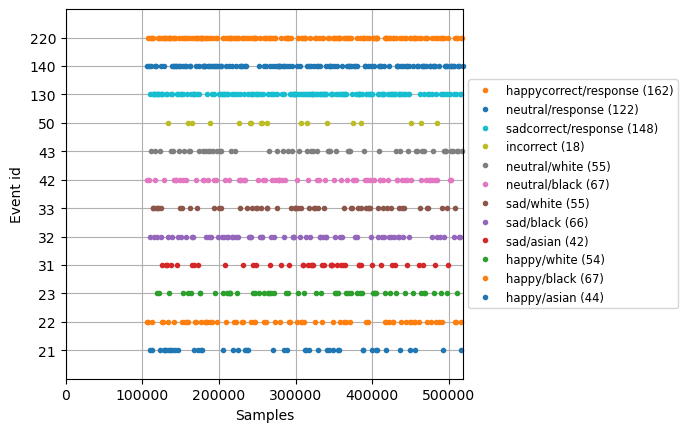

In [147]:
# visualize events  
mne.viz.plot_events(events, event_id=event_id, on_missing='warn'); 


In [148]:
# for diode timings
#tmin_d, tmax_d = -0.05, 0.1  # in s - setting a very narrow window around the trigger (=0) to be able to better inspect potential delays
tmin_d, tmax_d = -0.01, 0.05  # in s - setting a very narrow window around the trigger (=0) to be able to better inspect potential delays

baseline = None
epochs_diode = mne.Epochs(
    raw,
    events=events,
    event_id=event_id,
    tmin=tmin_d,
    tmax=tmax_d,
    baseline=baseline,
    verbose=False
)

### Timing delays

Using data from preloaded Raw for 900 events and 61 original time points ...
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/4057598217.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_diode.plot_image(picks='41');


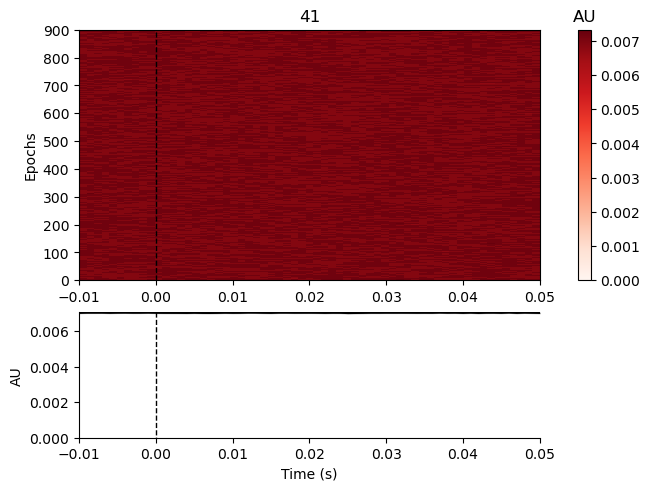

In [149]:
epochs_diode.plot_image(picks='41');

In [150]:
evokeds_diode = epochs_diode.average(picks='misc')

/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_15921/2795768579.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(dict(stim=evokeds_diode), picks='misc', vlines=[0, .033]);


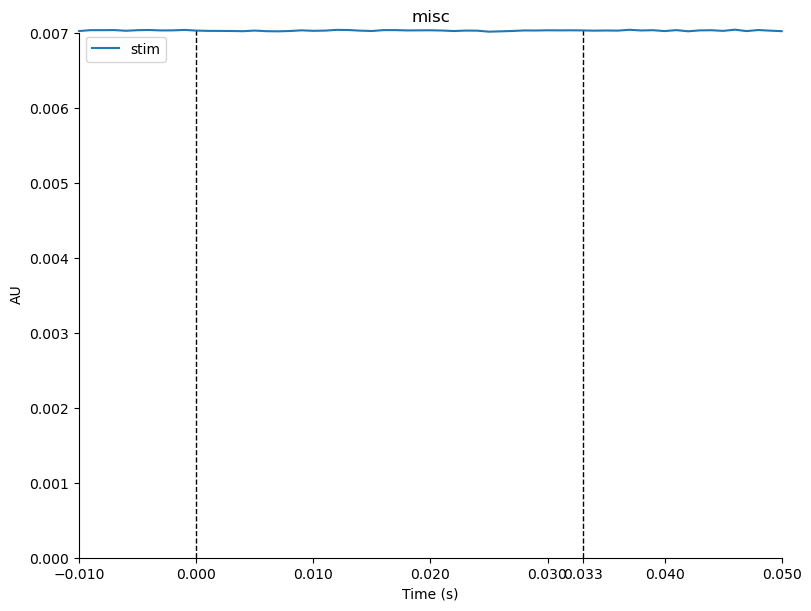

In [151]:
# plotting the averaged diode response across all trials
# - adding a vertical line at 33 ms to illustrate the 2-frame delay
mne.viz.plot_compare_evokeds(dict(stim=evokeds_diode), picks='misc', vlines=[0, .033]);

## re-adjusting toming based on diode timing above 


In [152]:
# creating a copy of the events-structure so that we can compare with the original events-structure
# after compensation/re-adjusment
events_diode = events.copy()

In [153]:
# having a quick look at the events-strucutre
events_diode[:20, :]

array([[     0,      0,  99999],
       [105588,      0,     42],
       [106247,      0,    140],
       [106439,      0,     22],
       [107196,      0,    220],
       [107386,      0,     22],
       [108130,      0,    220],
       [108323,      0,     42],
       [109056,      0,    140],
       [109239,      0,     32],
       [109880,      0,    130],
       [110056,      0,     21],
       [110657,      0,    220],
       [110856,      0,     43],
       [111642,      0,    140],
       [111840,      0,     22],
       [112370,      0,    220],
       [112556,      0,     21],
       [113120,      0,    220],
       [113307,      0,     33]])

In [154]:
# adding our delay to all timestamps in our event structure (which just marks the beginning of the recording)
events[1:-1,0] = events[1:-1,0]+33

In [155]:
# having a quick look to see that all timestamps have changed accordingly
print(events_diode[:10,:])
print(events[:10,:])
print(events[:10,0]-events_diode[:10,0])

[[     0      0  99999]
 [105588      0     42]
 [106247      0    140]
 [106439      0     22]
 [107196      0    220]
 [107386      0     22]
 [108130      0    220]
 [108323      0     42]
 [109056      0    140]
 [109239      0     32]]
[[     0      0  99999]
 [105621      0     42]
 [106280      0    140]
 [106472      0     22]
 [107229      0    220]
 [107419      0     22]
 [108163      0    220]
 [108356      0     42]
 [109089      0    140]
 [109272      0     32]]
[ 0 33 33 33 33 33 33 33 33 33]


## quick round of epoching and plotting to inspect the effect of re-adjusting the timeline wrt the triggers

In [156]:
# for ERPs
tmin, tmax = -0.1, 0.8  # in s

epochs_adjust = mne.Epochs(
    raw,
    events=events, # using the updated events-timestamps
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    verbose=False,
)

In [157]:
# for ERPs
tmin, tmax = -0.1, 0.8  # in s

epochs_orig = mne.Epochs(
    raw,
    events=events_diode, # using the original events-timestamps
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    verbose=False,
)

## Subsetting 

In [158]:
nw_adjust = epochs_adjust['neutral/white']
nb_adjust = epochs_adjust['neutral/black']

sw_adjust = epochs_adjust['sad/white']
sb_adjust = epochs_adjust['sad/black']
sa_adjust = epochs_adjust['sad/asian']

hw_adjust = epochs_adjust['happy/white']
hb_adjust = epochs_adjust['happy/black']
ha_adjust = epochs_adjust['happy/asian']

# original
nw_orig = epochs_orig['neutral/white']
nb_orig = epochs_orig['neutral/black']

sw_orig = epochs_orig['sad/white']
sb_orig = epochs_orig['sad/black']
sa_orig = epochs_orig['sad/asian']

hw_orig = epochs_orig['happy/white']
hb_orig = epochs_orig['happy/black']
ha_orig = epochs_orig['happy/asian']

## Plotting epochs

Using data from preloaded Raw for 900 events and 901 original time points ...


0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


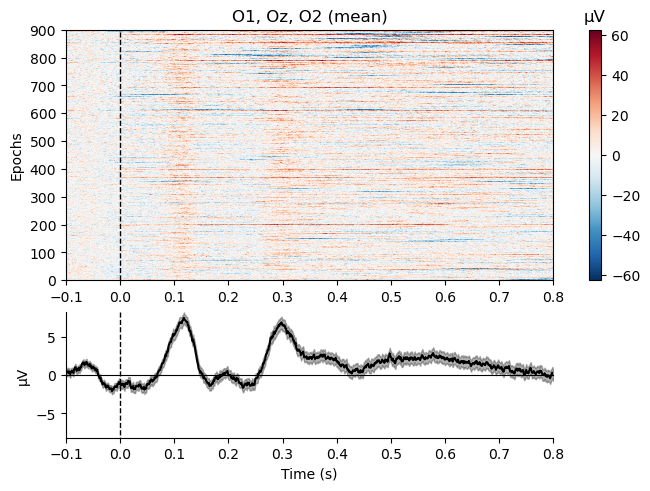

Using data from preloaded Raw for 900 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


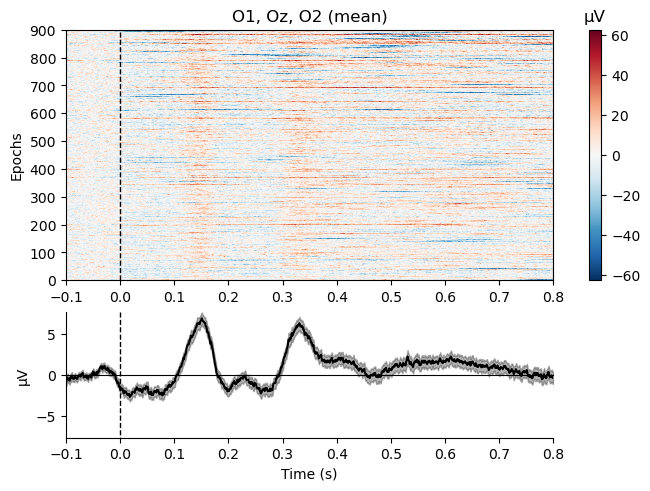

In [159]:
# plotting from channels over occipital cortex (looking for P1-N1-P2)
picks = ['O1','Oz','O2']
epochs_adjust.plot_image(picks=picks, combine='mean');
epochs_orig.plot_image(picks=picks, combine='mean');

Using data from preloaded Raw for 67 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


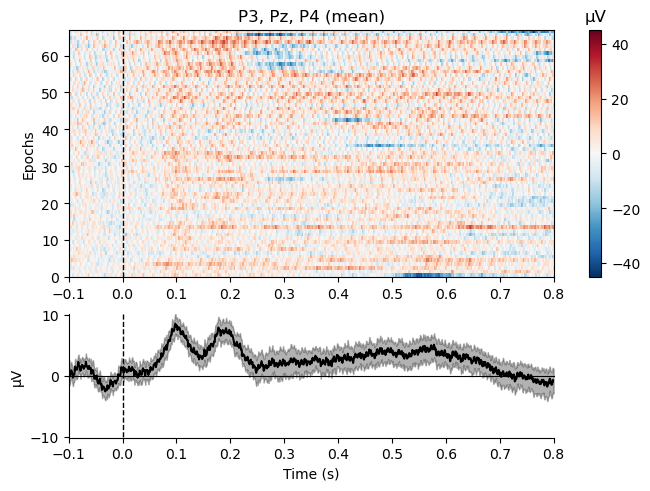

Using data from preloaded Raw for 67 events and 901 original time points ...
0 bad epochs dropped
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


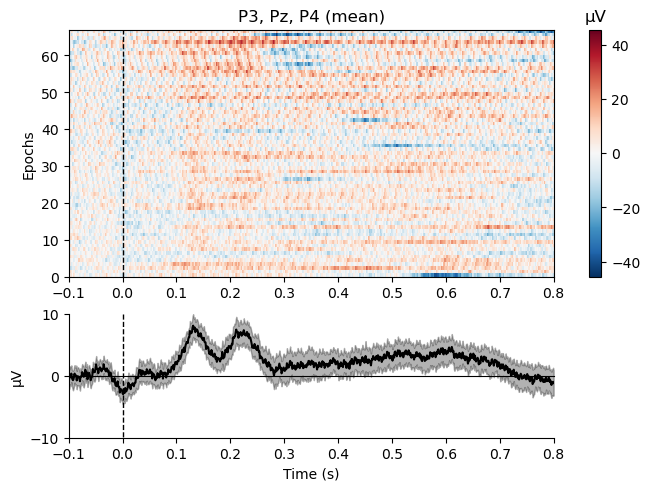

In [160]:
# plotting from channels over parietal cortex (potential P3) - and only the one event type
picks = ['P3','Pz','P4']
hb_adjust.plot_image(picks=picks, combine='mean');
hb_orig.plot_image(picks=picks, combine='mean');

# Evoked

In [161]:
# Compute averages for the adjusted epochs
evoked_nw_adjust = nw_adjust.average()
evoked_nb_adjust = nb_adjust.average()

evoked_sw_adjust = sw_adjust.average()
evoked_sb_adjust = sb_adjust.average()
evoked_sa_adjust = sa_adjust.average()

evoked_hw_adjust = hw_adjust.average()
evoked_hb_adjust = hb_adjust.average()
evoked_ha_adjust = ha_adjust.average()

# Compute averages for the original epochs
evoked_nw_orig = nw_orig.average()
evoked_nb_orig = nb_orig.average()

evoked_sw_orig = sw_orig.average()
evoked_sb_orig = sb_orig.average()
evoked_sa_orig = sa_orig.average()

evoked_hw_orig = hw_orig.average()
evoked_hb_orig = hb_orig.average()
evoked_ha_orig = ha_orig.average()
# generally 
evoked_adjust = epochs_adjust.average()
evoked_orig = epochs_orig.average()

No projector specified for this dataset. Please consider the method self.add_proj.


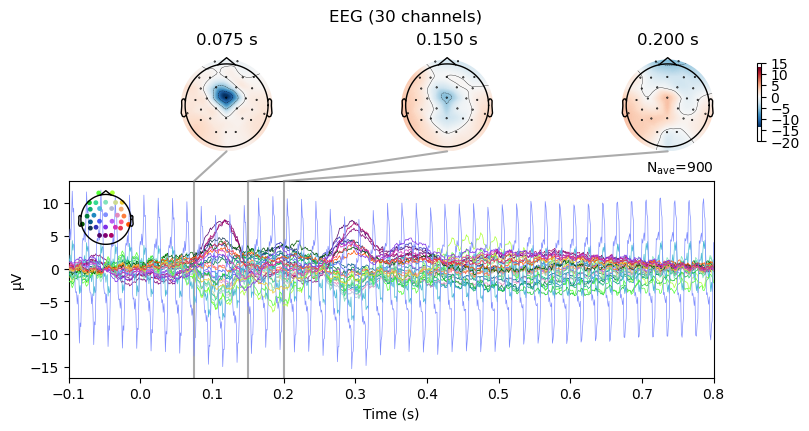

No projector specified for this dataset. Please consider the method self.add_proj.


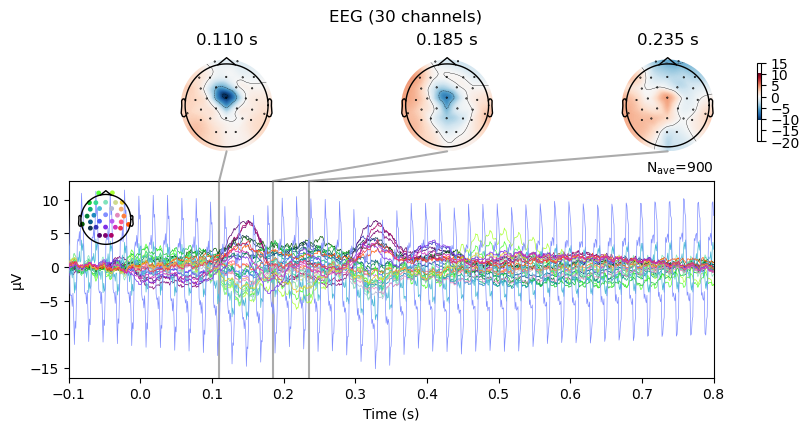

In [162]:
times_adjust = [0.075, 0.15, 0.2]
times_orig = [0.11, 0.185, 0.235]

evoked_adjust.plot_joint(times=times_adjust);
evoked_orig.plot_joint(times=times_orig);

No projector specified for this dataset. Please consider the method self.add_proj.


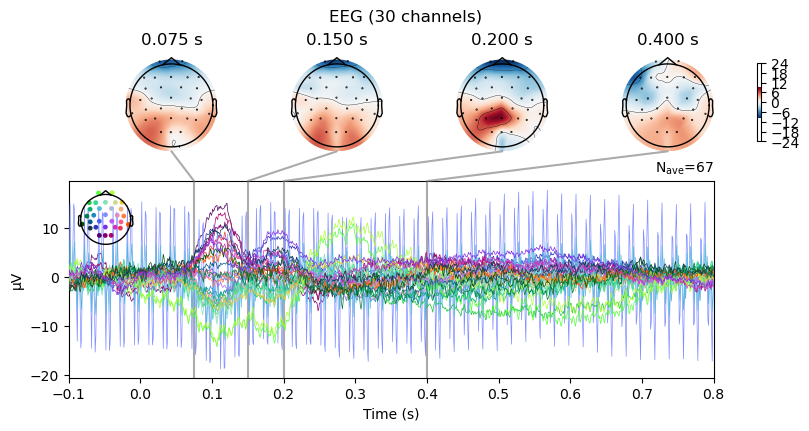

No projector specified for this dataset. Please consider the method self.add_proj.


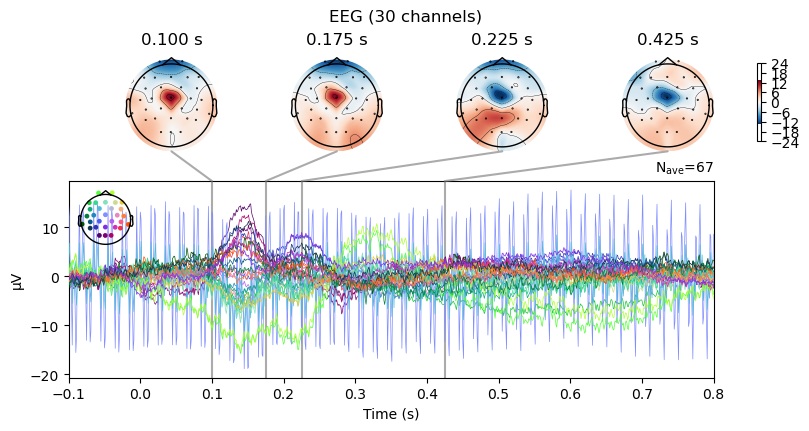

In [163]:
times_adjust = [0.075, 0.15, 0.2, 0.4]
times_orig = [0.1, 0.175, 0.225, 0.425]

evoked_hb_adjust.plot_joint(times=times_adjust);
evoked_hb_orig.plot_joint(times=times_orig);

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


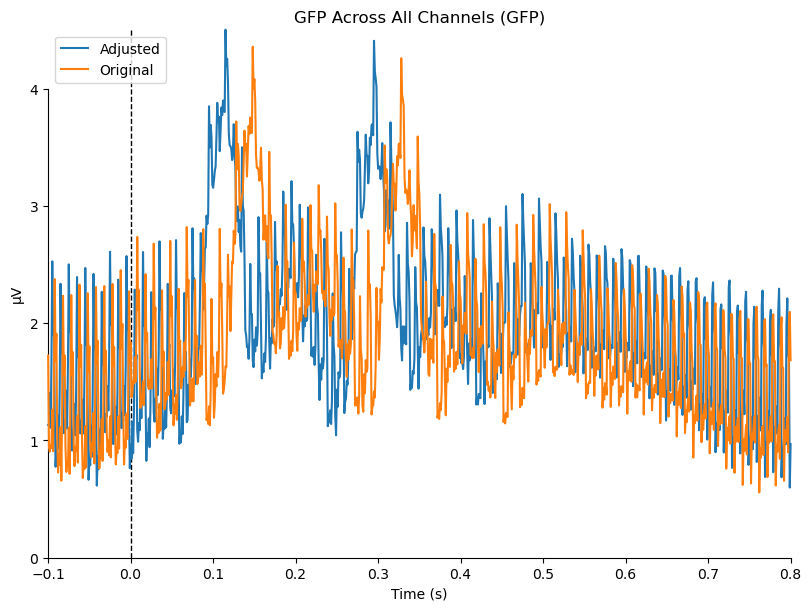

combining channels using "mean"
combining channels using "mean"


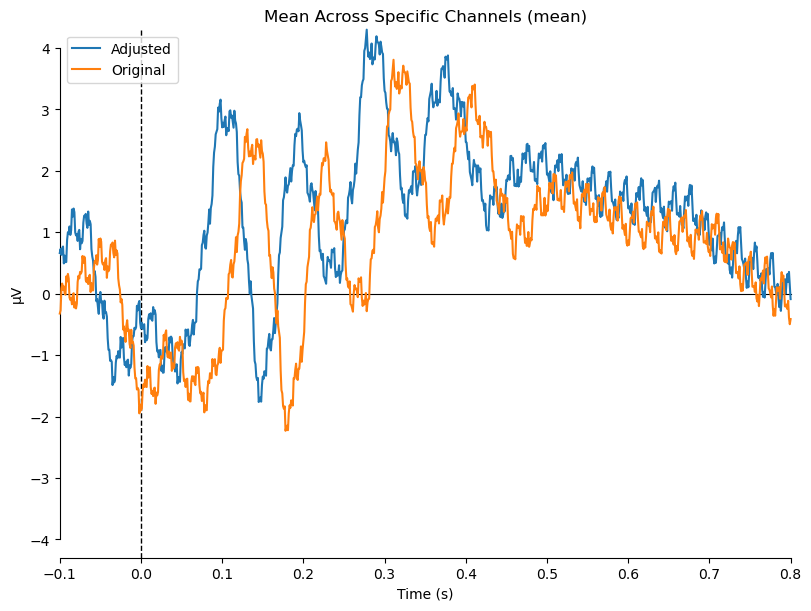

[<Figure size 800x600 with 1 Axes>]

In [164]:
# Plotting GFP across all channels for both adjusted and original epochs
mne.viz.plot_compare_evokeds({'Adjusted': evoked_adjust, 'Original': evoked_orig}, title='GFP Across All Channels')

# Plotting mean across specific channels for both adjusted and original epochs
mne.viz.plot_compare_evokeds({'Adjusted': evoked_adjust, 'Original': evoked_orig}, picks=picks, combine='mean', title='Mean Across Specific Channels')



### Done with diode stuff

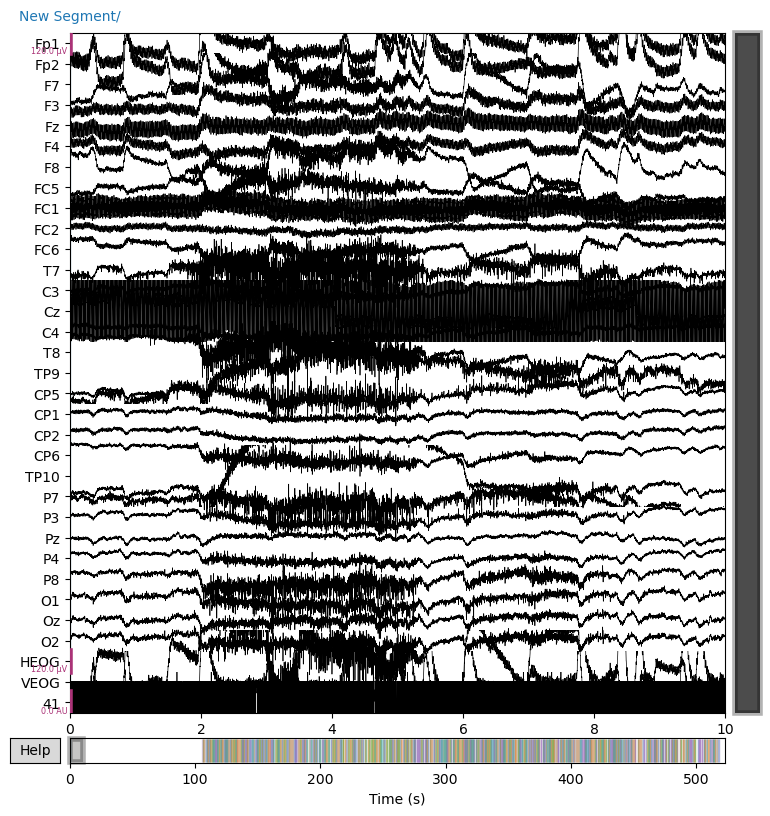

In [165]:
# Plot 
raw.plot(scalings=60e-6, n_channels=33);

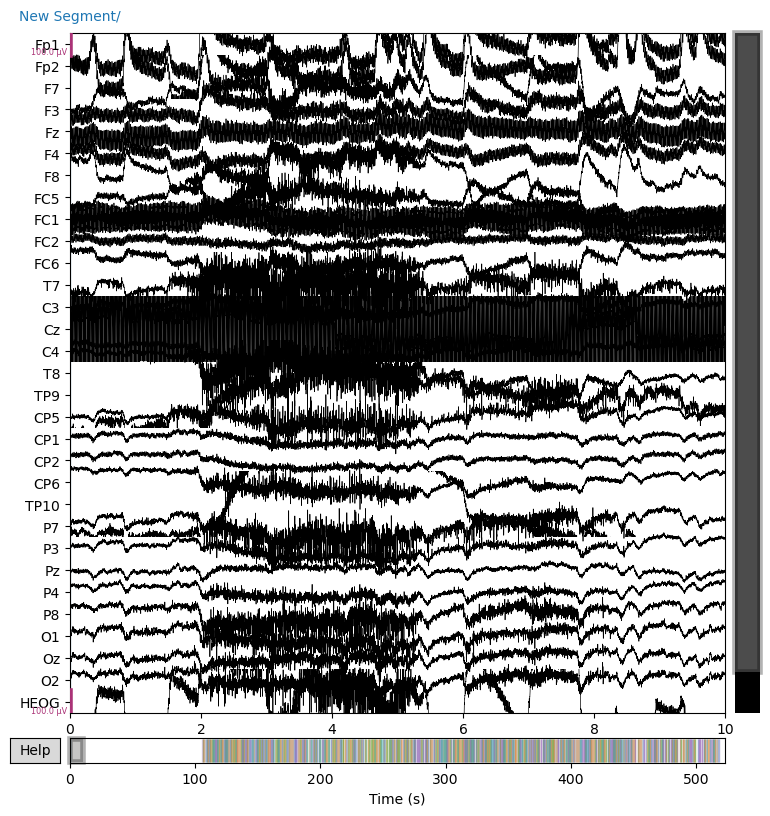

In [166]:
# Plot 
raw.plot(n_channels=31, scalings=50e-6);

# Now we do the other preprocessing !

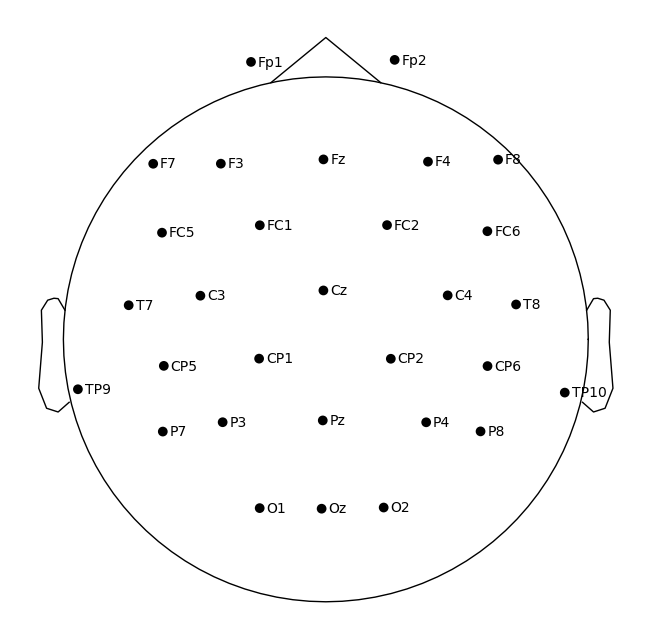

In [167]:
# remove bad channels 
mne.viz.plot_sensors(raw.info, kind='topomap', ch_type='eeg', show_names=True, title='EEG Sensor Locations');
raw.info["bads"] = ["Cz", "FC1", "41", "Fz"]

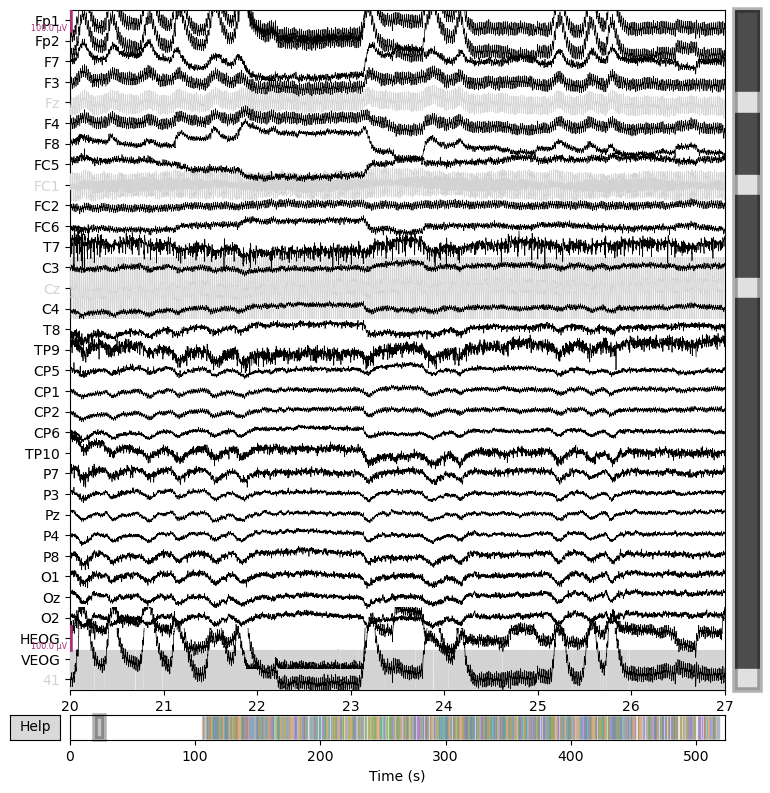

In [168]:
# Plot again after removing bad channels
raw.plot(n_channels=33, scalings=50e-6, duration = 7, start = 20) ;

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


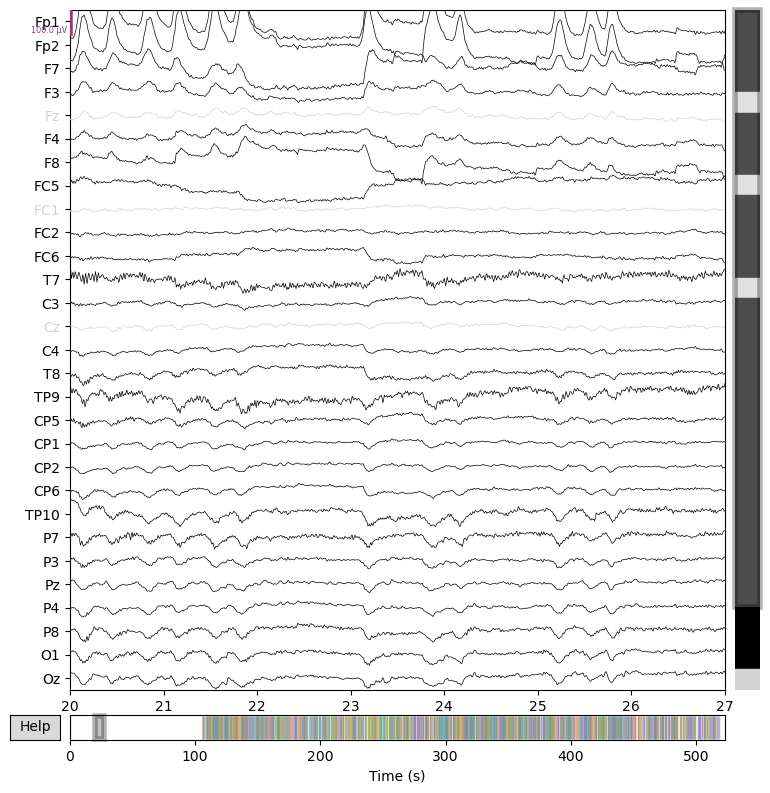

In [169]:
## Filter 
raw.filter(l_freq = 0.1, h_freq =40)
raw.plot(n_channels=29, scalings=50e-6, duration=7, start=20);

Fitting ICA to data using 27 channels (please be patient, this may take a while)
Selecting by explained variance: 7 components
Fitting ICA took 4.6s.


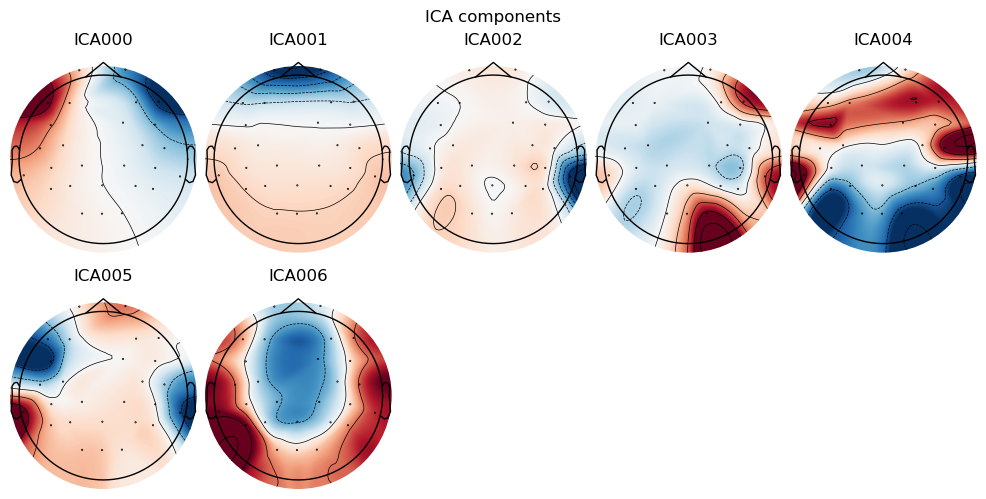

Creating RawArray with float64 data, n_channels=9, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


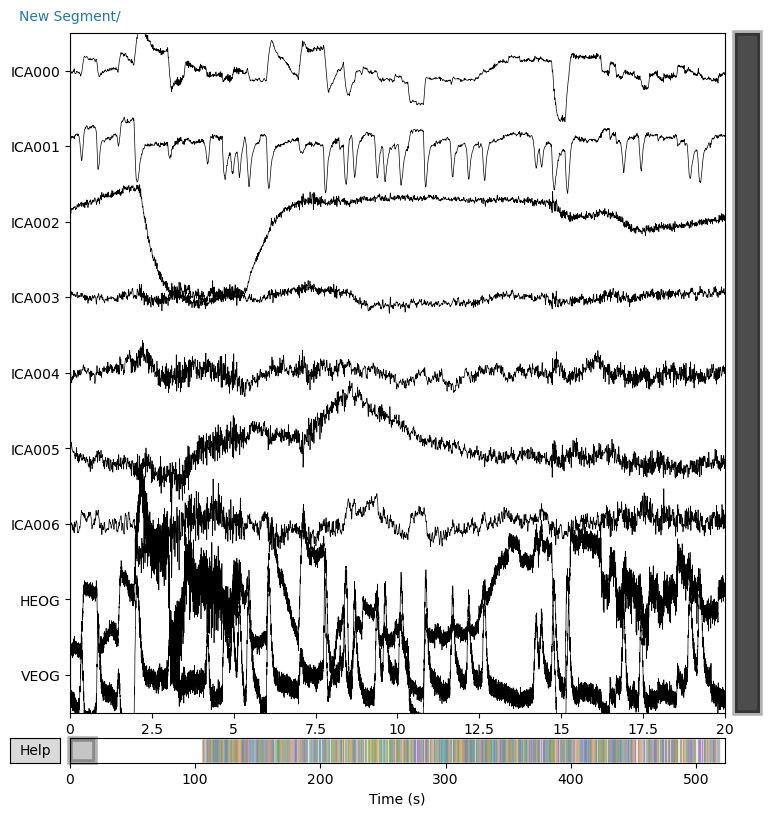

Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components


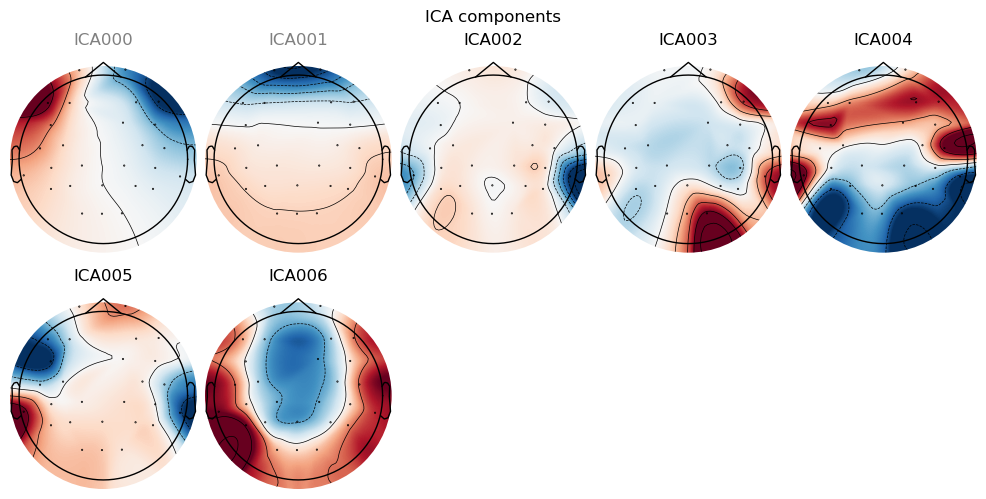

Creating RawArray with float64 data, n_channels=9, n_times=523240
    Range : 0 ... 523239 =      0.000 ...   523.239 secs
Ready.


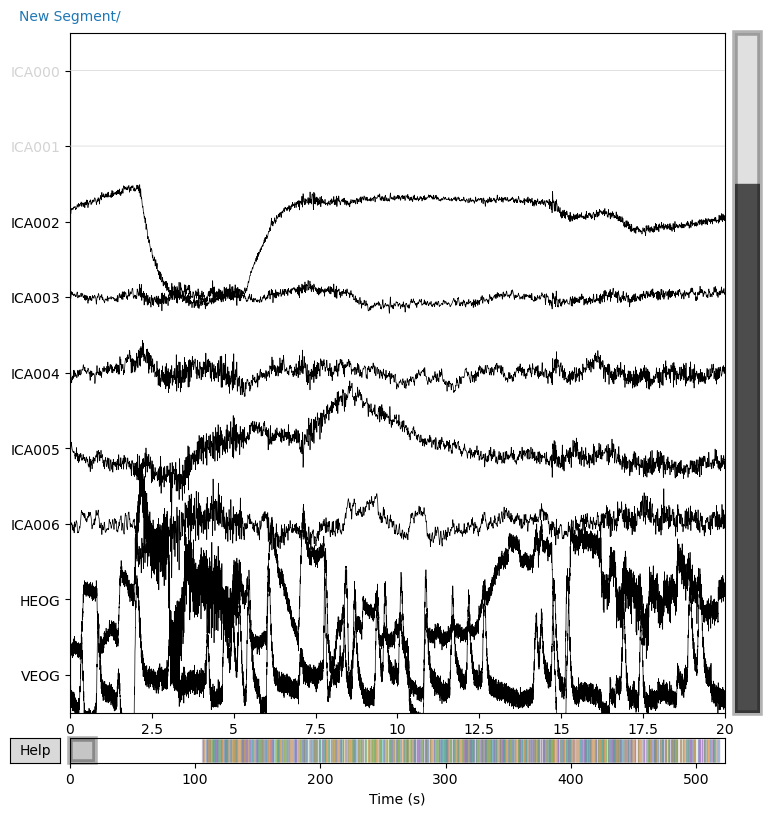

In [170]:
# ICA
import sklearn # scikit-learn is needed to run ICA (Independent Component Analysis)

ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica.fit(raw)
ica.plot_components();

ica.plot_sources(raw);

ica.exclude = [0, 1]
ica.apply(raw)

# Plot again after applying ICA
ica.plot_components();
ica.plot_sources(raw);

In [171]:
# set time window
tmin, tmax = -0.1, 0.7
# reject criterion to 150 µV
reject = {'eeg': 150e-6}
# create a pick with only eeg channels 
picks = ['eeg']

# Create epochs  
epochs = mne.Epochs(
    raw,
    events=events,
    event_id=event_id,
    tmin=tmin,
    tmax=tmax,
    verbose=False
)

# Load data explicitly
epochs.load_data()

# Resample epochs
epochs.resample(250)


Using data from preloaded Raw for 900 events and 801 original time points ...


0 bad epochs dropped


<Epochs |  900 events (all good), -0.1 – 0.696 s, baseline -0.1 – 0 s, ~45.4 MB, data loaded,
 'neutral/black': 67
 'neutral/white': 55
 'happy/asian': 44
 'happy/black': 67
 'happy/white': 54
 'sad/asian': 42
 'sad/black': 66
 'sad/white': 55
 'incorrect': 18
 'sadcorrect/response': 148
 and 2 more events ...>

In [172]:
outpath = os.path.join(os.getcwd(), 'epochs')

if not os.path.exists(outpath):
    os.makedirs(outpath)

epochs.save(os.path.join(outpath, 'epochs_own-epo.fif'), overwrite=True)

Overwriting existing file.
Overwriting existing file.


Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated


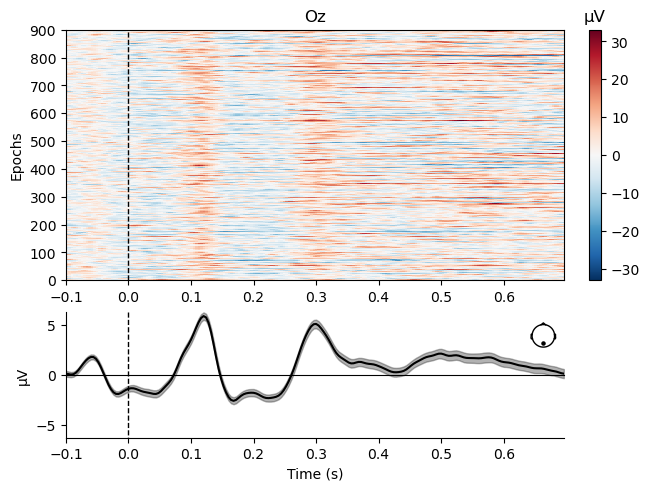

In [173]:
# consistency plot
epochs.plot_image(picks=['Oz']);

Not setting metadata
164 matching events found
No baseline correction applied
0 projection items activated


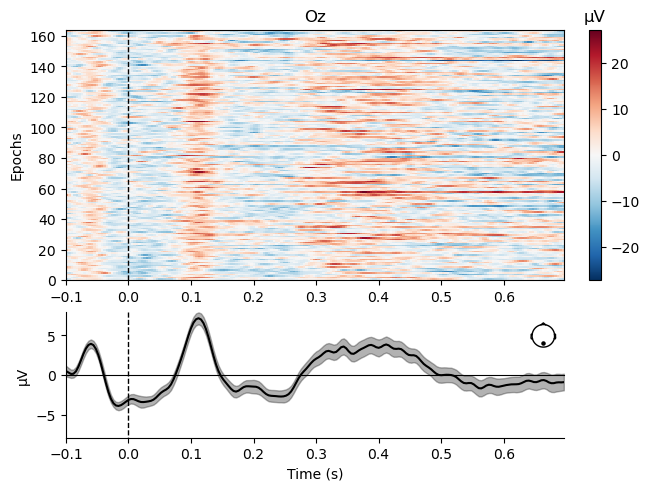

Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated


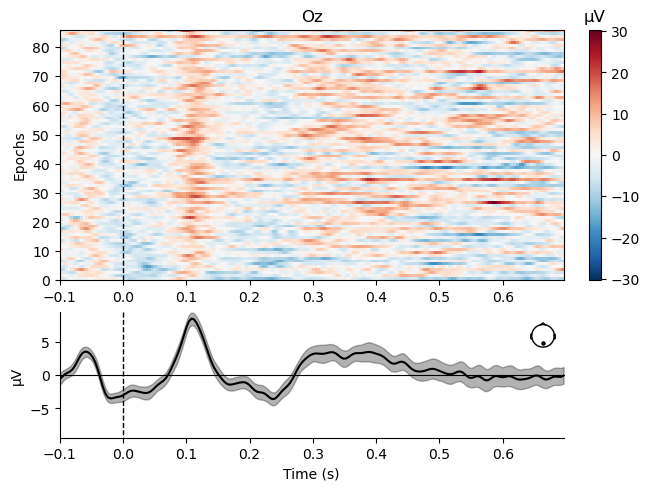

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


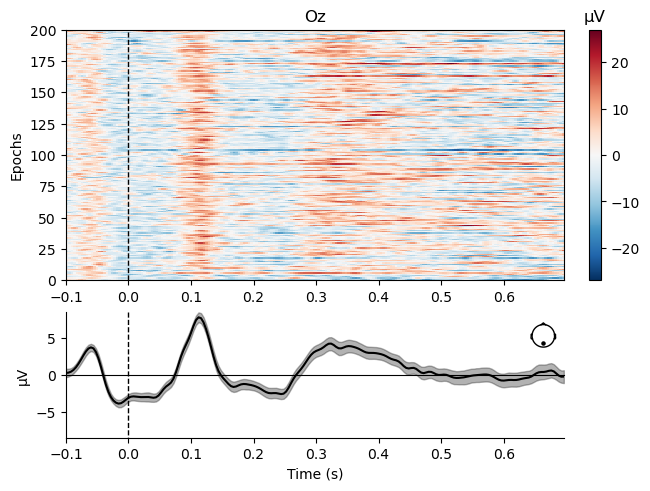

In [174]:
# Plot the white epochs 
white_events = ['white/happy', 'white/neutral', 'white/sad'] 
white_epochs = epochs[white_events] 
white_epochs.plot_image(picks=['Oz']);

# Plot the asian epochs 
asian_events = ['asian/happy', 'asian/sad'] 
asian_epochs = epochs[asian_events] 
asian_epochs.plot_image(picks=['Oz']);

# Plot the black epochs 
black_events = ['black/happy', 'black/neutral', 'black/sad'] 
black_epochs = epochs[black_events] 
black_epochs.plot_image(picks=['Oz']);



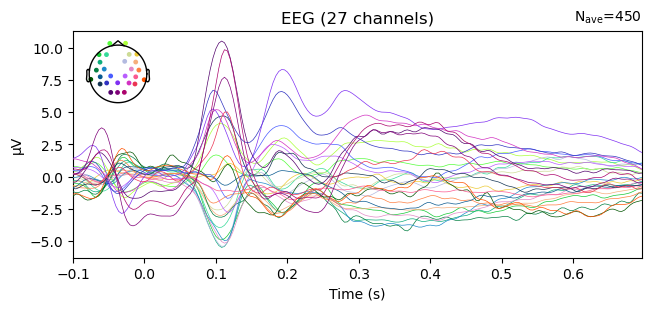

In [175]:
# Plot the response epochs 
img_events = ['happy/white', 'neutral/white', 'sad/white', 'happy/black', 'neutral/black', 'sad/black', 'happy/asian', 'sad/asian']  # all image events 
img_epochs = epochs[img_events] 

# Average across epochs
img_avg = img_epochs.average()
img_avg.plot();

In [176]:
outpath = os.path.join(os.getcwd(), 'epochs')

if not os.path.exists(outpath):
    os.makedirs(outpath)

epochs.save(os.path.join(outpath, 'epochs_own-epo.fif'), overwrite=True)


Overwriting existing file.
Overwriting existing file.
